El conjunto de datos VentaViviendas contiene información sobre el precio de venta de una serie de viviendas, junto con las características básicas de las mismas. Las variables contenidas en el fichero son (observa que hay dos variables objetivo diferentes):

![Fig1. Descripción de los datos](VentaViviendas.png)

El objetivo fundamental de este estudio es adecuar los datos sobre venta de viviendas para ajustar modelos de regresión lineal y logítica para las variable objetivo Price y Luxury, respectivamente.

Cuando ajustamos modelos de regresión, nuestra intención principal es poder predecir los futuros valores de la variable objetivo como función de las características o variables predictoras, llamados en este caso también regresores. Para obtener modelos más precisos, lo que se traduce en mejores predicciones, es muy importante que las variables predictoras se encuentren libres de cierto peligros…estos peligros sin duda harán que el modelo se “confunda” y ajuste peor a los datos.

Por tanto, en la primera parte del estudio es fundamental convertir los datos brutos en un conjunto de datos “limpio”.

El proceso de “limpieza” de un conjunto de datos debe incluir:

Evaluar el tipo de variable en la lectura (num, factor) y cambiar en caso de error (con posiciones de variables o con nombres utilizando subset)

Contar el número de valores distintos por variable. Si <10 sospecha de categórica

Evaluar la tabla de frecuencia de las que consideramos categóricas en busca de categorías podo representadas. En caso de encontrarlas, bedrooms, bathrooms… recategorizar uniendo las categorías adyacentes que se considere necesario.

Buscar valores mal codificados (999, -1, ?) tanto en variables nominales como continuas. Si no encontramos la causa de la mala codificación (patrón) convertir a missing

Evaluar la incidencia de los missings en el archivo. Observaciones con más del 50% de missing deben ser eliminadas. Variables con missing han de ser imputadas (se pueden eliminar pero de momento intentaremos no perder información).

Finalmente generar uno o más conjunto de datos depurados (sin missings, con variables de rango lógico, sin fallos de codificación, sin variables nominales con categorías minoritarias, sin variables numéricas con pocas categorías etc..

## Apartado 1

**Importa el conjunto de datos y verifica que el tipo de las variables se haya asignado correctamente.**

Este es el primer paso, es posible que al leer el archivo desde una fuente externa, excel, txt, csv, spss, sas7bda7, etc… el tipo de las variables contenidas sufra modificaciones en su consideración, así, R puede cometer “errores” de lectura considerando una variable claramente categórica como numérica o viceversa.

Tenemos que prestar mucha atención a esto, una variable mal considerada como factor o numérica puede dar lugar a muchos errores. Es muy importante pensar que mucha de la programación en el estudio y depuración de los datos, se realiza de acuerdo a esta distinción ya que las variables numéricas y categóricas (factores) han de ser tratadas de distinta forma. En definitiva, una confusión en este aspecto nos puede llevar a errores y consumir nuestro tiempo.

En este caso, el archivo origen es un excel por lo que utilizaremos la función adecuada read_excel. Vamos a cargar el archivo donde tenemos definidas las funciones que nos ayudan a generar nuestros estudios. El archivo se llama **NuestrasFunciones.py** y tenemos dos alternativas, o bien ejecutar el archivo si se encuentra en otra carpeta o directamente importarlo si se encuentra en la misma carpeta.


In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Si las funciones están en esta misma carpeta podemos hacer
from NuestrasFunciones import *

# De lo contrario podemos hacer algo así como...
#execfile('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\NuestrasFunciones.py')

# Lectura de datos
viviendas = pd.read_excel('VentaViviendas.xlsx')
viviendas.head()


,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


Este código está preparado para funcionar sobre los Venta de viviendas. Se presenta en la siguiente tabla, la información sobre las variables contenidas en el archivo.


## Apartado 2

**Realiza un análisis descriptivo para determinar si existen errores en las variables (valores mal codificados, valores fuera de rango, categorías con poca representación, simetría y curtosis de las variables cuantitativas, etc.).**

Con el anterior se observan varios posibles errores en la consideración de tipos de variables. Así, variables que son claramente factores están codificadas como numéricas… Actuaremos seguro sobre ellas.

Con la función info, podemos obtener un summary de los tipos de variables almacenados en el dataset como python lo ha entendido en la lectura. 


In [2]:
# Información del dataset
viviendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

In [3]:
viviendas.describe()



,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,basement,yr_built,yr_renovated,lat,long
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2014.316800,6.589400,5.441291e+05,0.422800,3.624200,2.139500,2077.382000,1.373248e+04,1.496400,-0.012800,0.098200,1784.89840,0.391200,1971.084200,86.157000,47.561237,-122.213915
std,0.465275,3.120377,3.729869e+05,0.494054,3.710165,0.867606,916.477607,3.758144e+04,0.541522,0.171587,0.297615,824.33091,0.488068,29.242444,405.523818,0.138218,0.140557
min,2014.000000,1.000000,8.650000e+04,0.000000,0.000000,0.000000,370.000000,-1.000000e+00,1.000000,-1.000000,0.000000,370.00000,0.000000,1900.000000,0.000000,47.155900,-122.505000
25%,2014.000000,4.000000,3.249375e+05,0.000000,3.000000,1.500000,1410.000000,4.500000e+03,1.000000,0.000000,0.000000,1190.00000,0.000000,1951.000000,0.000000,47.475275,-122.330000
50%,2014.000000,6.000000,4.510000e+05,0.000000,3.000000,2.500000,1910.000000,7.312000e+03,1.500000,0.000000,0.000000,1550.00000,0.000000,1975.000000,0.000000,47.574500,-122.226500
75%,2015.000000,9.000000,6.450000e+05,1.000000,4.000000,2.500000,2560.000000,1.028425e+04,2.000000,0.000000,0.000000,2220.00000,1.000000,1996.000000,0.000000,47.678925,-122.124000
max,2015.000000,12.000000,7.062500e+06,1.000000,70.000000,6.000000,10040.000000,1.164794e+06,3.500000,1.000000,1.000000,7680.00000,1.000000,2015.000000,2015.000000,47.777000,-121.352000


Para poder observar más cosas sobre el archivo, podemos pedir a python que nos muestre las distribuciones de las variables de un modo sencillo y no muy completo con la función describe. Procediendo de esta forma se pueden ver cosas “raras”:

- variable bedrooms -> máximo en 70…
- variable sqf_lot -> mínimo en -1…
- variable waterfront -> valor -1…
- variable condition -> missing no declarado ‘?’…
- variable yr_renovated -> distribución muy extraña…no es una buena variable..transformar

Para la decisión de conversión en factores, una herramienta muy útil es contar el número de valores distintos de las variables y fijar un criterio de decisión, por debajo de K valores distintos diremos que es factor. Puede ser K=10, pero no lo tomemos al pie de la letra!! Hay variables que, por su naturaleza o distribución funcionarán mejor como nominales que como continuas.

### Valores únicos de las variables

Con nunique podemos obtener el número de valores distintos por cada variable para evaluar cuáles deberían ser factores.


In [4]:
# Número de valores distintos por variable
viviendas.nunique()


year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64

Precisamente se puede observar que las variables que cuentan el numero de habitaciones y baños tienen 33 y 12 valores únicos y máximo en 70 y 6, respectivamente. Si pensamos fríamente, casas con 70 habitaciones?? Este tipo de cosas deben disparar una alarma inmediatamente. Lo primero que debemos hacer es ver la distribución de esas variables y decidir si tiene sentido mantenerlas como numéricas o por el contrario convertirlas en factores. podemos dibujarlas con un histograma o boxplot..


Veamos su histograma.


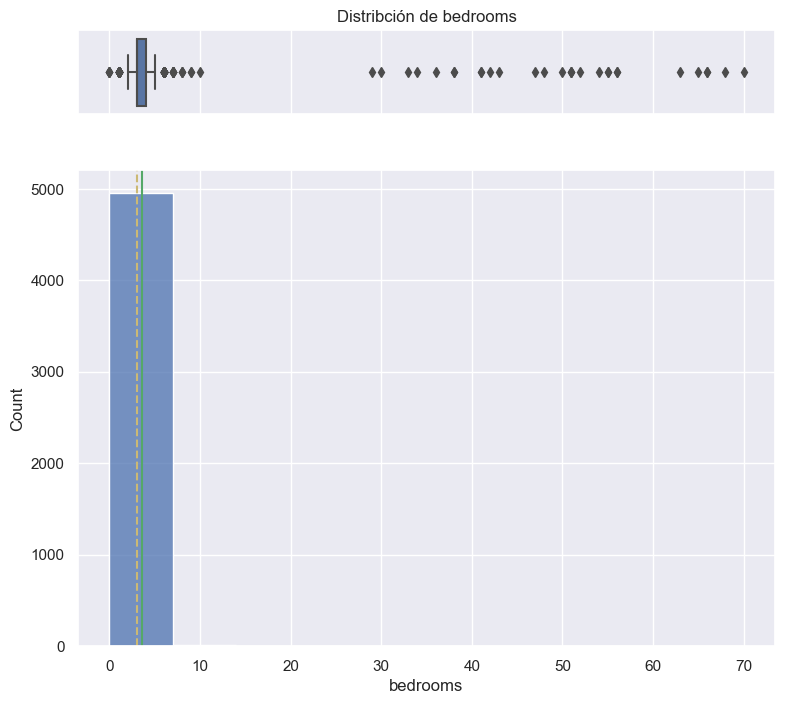

In [5]:
histogram_boxplot(viviendas.bedrooms, bins = 10, font_scale=1, title="Distribción de bedrooms")



Mala pinta...Vamos a ver como cruza con la variable objetivo continua por si parece que tiene sentido todo esto. 



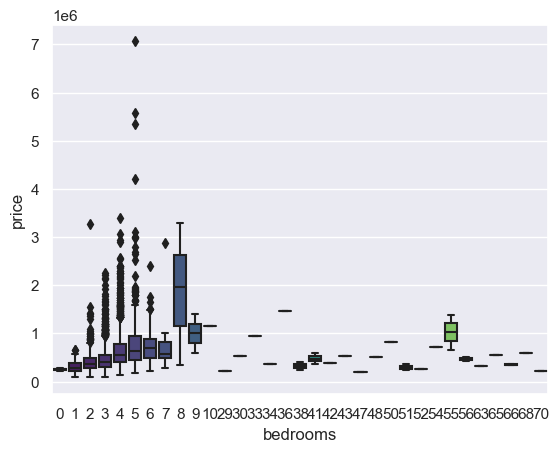

In [6]:
plt.clf()
sns.boxplot(x='bedrooms',y='price',data=viviendas,palette='viridis')
plt.show()


Pues tenemos viviendas con 60 y 70 habitaciones a precio de viviendas de una sola habitación...raro! La distribución conjunta no parece muy buena y hemos de plantear alternativas. 

Pensamos que, de ser legítimos, a mayor número de habitaciones mayor superficie arriba...


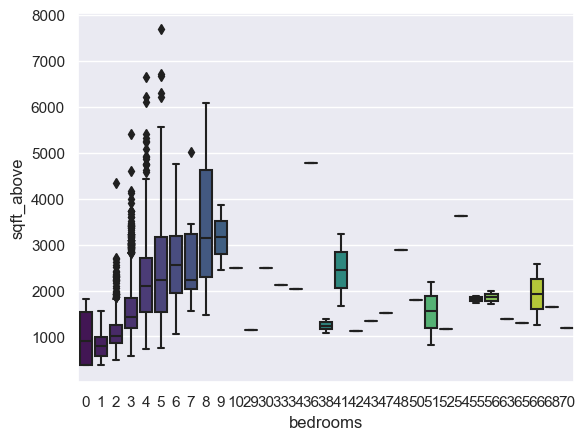

In [7]:
plt.clf()
sns.boxplot(x='bedrooms',y='sqft_above',data=viviendas,palette='viridis')
plt.show()


Uff..no parece que esto tenga mucho sentido..quizá algunas nos valen pero muchas nos parecen erróneas.. Posibilidades de tratamiento en este punto.

1. Considerarla numérica y convertir los outliers en missings (o todo valor mayor que un número razonable donde la cosa se empieza a torcer..)
2. Convertir la variable a factor y unir categorías.

La primera opción causará una pérdida de información real, y posteriormente en la imputación, una subestimación de la verdadera varianza de la variable….al no tener una distribución puramente continua, ya que son números enteros, no parece la mejor opción y preferiremos la conversión a factor y la unión de las categorías (así no se pierde nada de info..aunque puede que esa última categoría sea un miscelaneo poco fiable..). En realidad sería buena opción mantener ambas opciones y probarlas en modelo... 


## Apartado 3

 **Corrige los errores detectados en el apartado anterior.**

Ya conocemos los problemas existentes, es hora de actuar!!

Problemas detectados:

1. Errores en tipos de variables 
    + Variables *Luxury*, *basement*, *waterfront*, *view* y *Condition* son factores porque así se indica en la descripción del archivo.
    + Variables *bedrooms* y *bathrooms* hemos visto que podrían ser factores debido a su distribución. De momento esperaremos a recategorizar para pasar a factor.
    + Variable *floors* tiene solo 6 valores distintos...seguro a factor.
    + Luego tenemor las variables *year* y *month* que, en caso de que queramos estudiar su influencia, habría que convertir seguro la primera y tal vez la segunda...con esta última podemos hacer el truco de mantenerla continua y crear un factor trimestres (nominal con 4 categorías) por ejemplo...
2. Valores fuera de rango
    + Variable *sqf_lot* -> mínimo en -1...
    + Variable *waterfront* -> valor -1...
3. Missings no declarados
    + Variable *Condition* tiene una categoría '?'
4. Missings en el archivo bruto. No parece haber problema de valores perdidos...


1. A factor las que tienen menos de 10 valores distintos.


In [8]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(viviendas.loc[:,viviendas.nunique() < 10]);  

# Podemos cambiar el tipo de todas ellas a factor de una vez
viviendas[to_factor] = viviendas[to_factor].astype('category')


Vamos a contar el número de valores únicos de las variables numéricas por si nos hemos dejado algo por ahí. 



In [9]:
# Número de valores distintos por variable
viviendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   category
 1   month         5000 non-null   int64   
 2   price         5000 non-null   int64   
 3   Luxury        5000 non-null   category
 4   bedrooms      5000 non-null   int64   
 5   bathrooms     5000 non-null   float64 
 6   sqft_living   5000 non-null   int64   
 7   sqft_lot      5000 non-null   int64   
 8   floors        5000 non-null   category
 9   waterfront    5000 non-null   category
 10  view          5000 non-null   category
 11  condition     5000 non-null   category
 12  sqft_above    5000 non-null   int64   
 13  basement      5000 non-null   category
 14  yr_built      5000 non-null   int64   
 15  yr_renovated  5000 non-null   int64   
 16  lat           5000 non-null   float64 
 17  long          5000 non-null   float64 
dtypes: categ

### Descirptivos para las variables 



In [10]:
# Número de valores distintos por variable
viviendas.describe()


,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.373248e+04,1784.89840,1971.084200,86.157000,47.561237,-122.213915
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.758144e+04,824.33091,29.242444,405.523818,0.138218,0.140557
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,-1.000000e+00,370.00000,1900.000000,0.000000,47.155900,-122.505000
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,4.500000e+03,1190.00000,1951.000000,0.000000,47.475275,-122.330000
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.312000e+03,1550.00000,1975.000000,0.000000,47.574500,-122.226500
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.028425e+04,2220.00000,1996.000000,0.000000,47.678925,-122.124000
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,2015.000000,47.777000,-121.352000


Podemos sacar los descriptivos básicos para las categóricas.



In [11]:
# Número de valores distintos por variable
viviendas.describe(exclude=np.number)


,year,Luxury,floors,waterfront,view,condition,basement
count,5000,5000,5000.0,5000,5000,5000,5000
unique,2,2,6.0,3,2,5,2
top,2014,0,1.0,0,0,B,0
freq,3416,2886,2463.0,4852,4509,3254,3044


### Inspección gráfica

Podemos inspeccionar las distribuciones gráficamente para completar la exploración. En este punto, nos podemos plantear la creación de un par de funciones gráficas que nos faciliten el trabajo, de tal forma que las podamos aplicar al dataset completo para visualizarlo de un plumazo. 

En primer lugar, como me gusta ver el histograma y el boxplot en relación para cada variable, vamos a definir una función que nos saque ambos gráficos juntos. Podríamos adoptar varias formas de pensar de cara a la programación, por flexibilidad, decidimos que la función trabaje sobre una potencial columna o variable, así podremos aplicarla a todas o parte de las columnas del dataset.


Cat
Cont


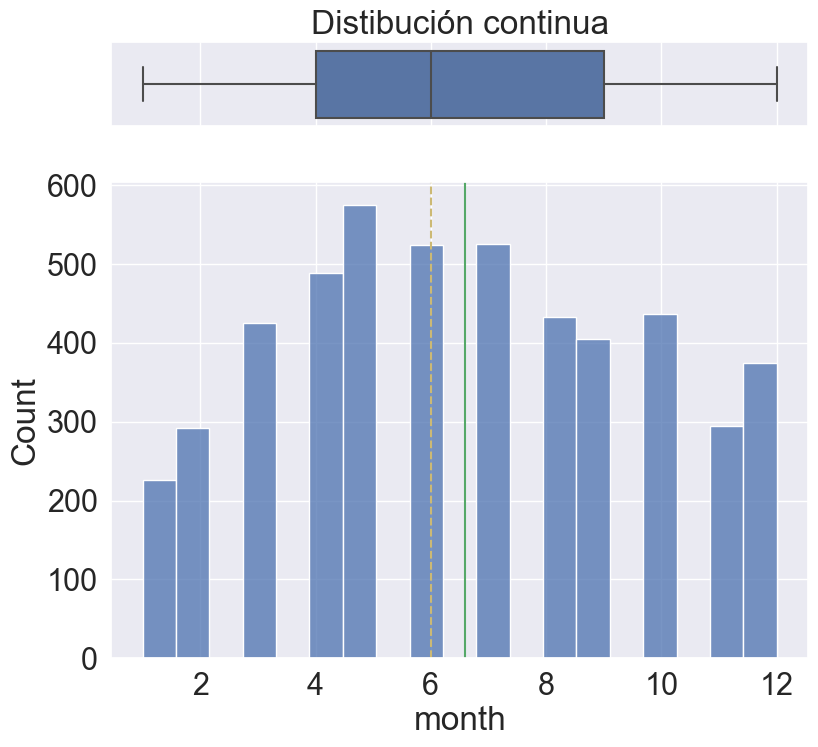

Cont


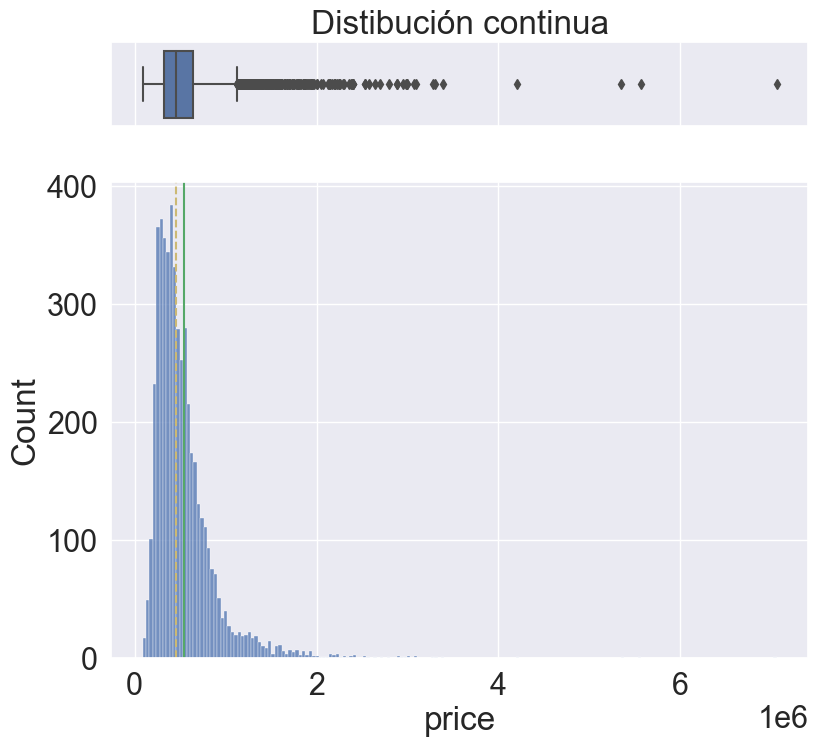

Cat
Cont


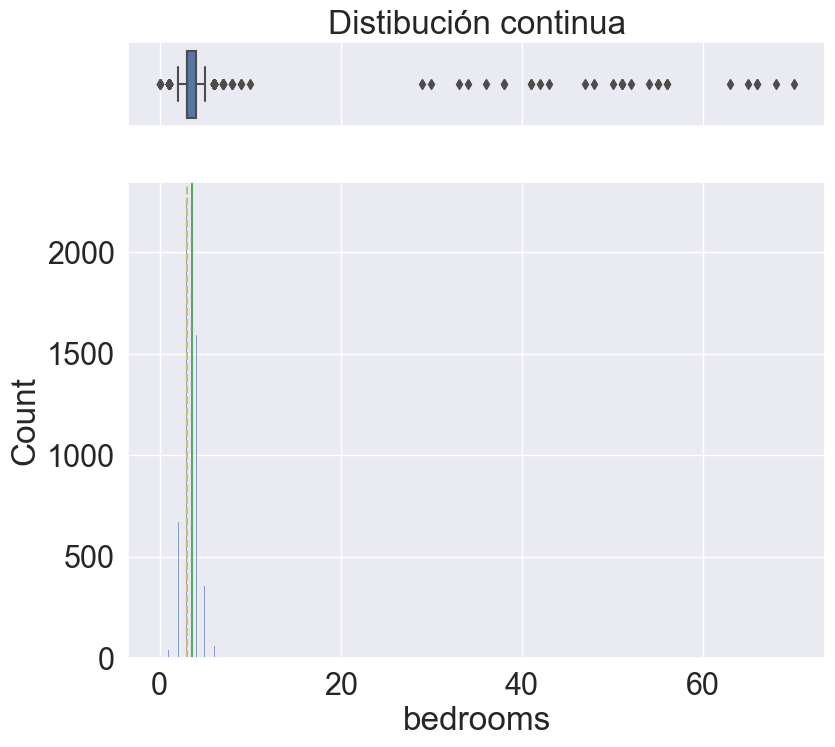

Cont


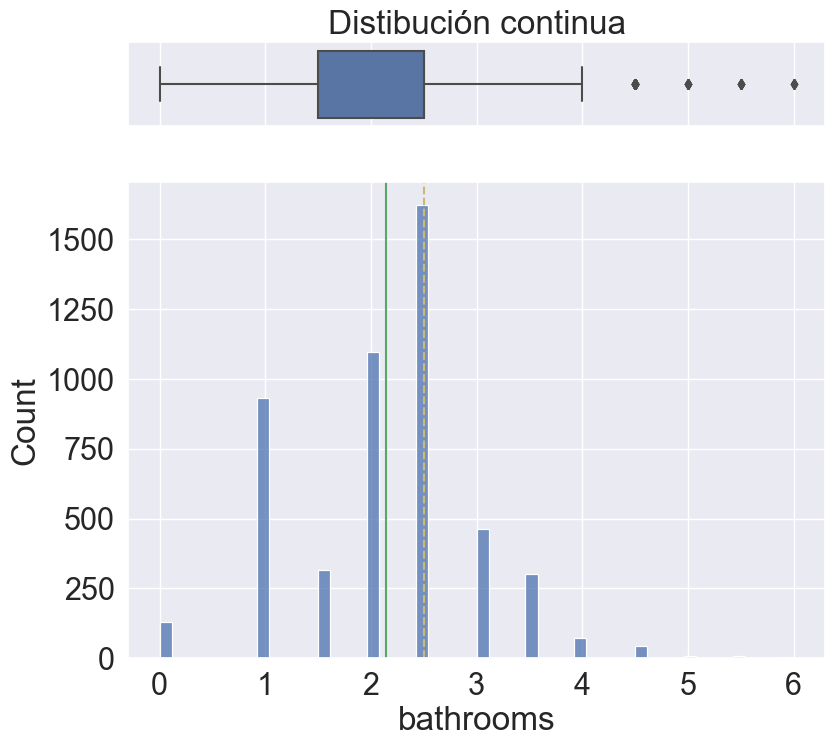

Cont


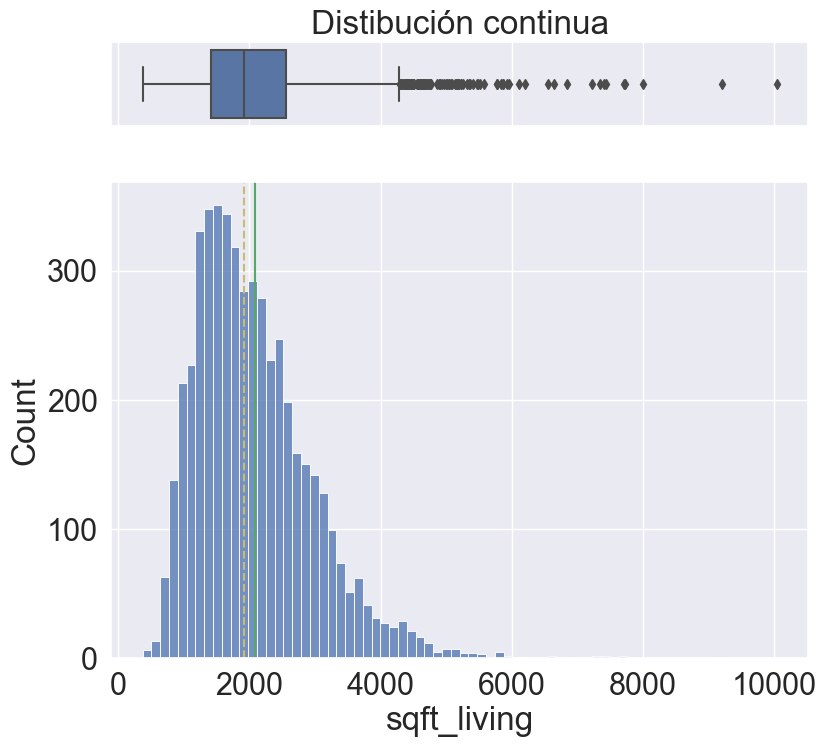

Cont


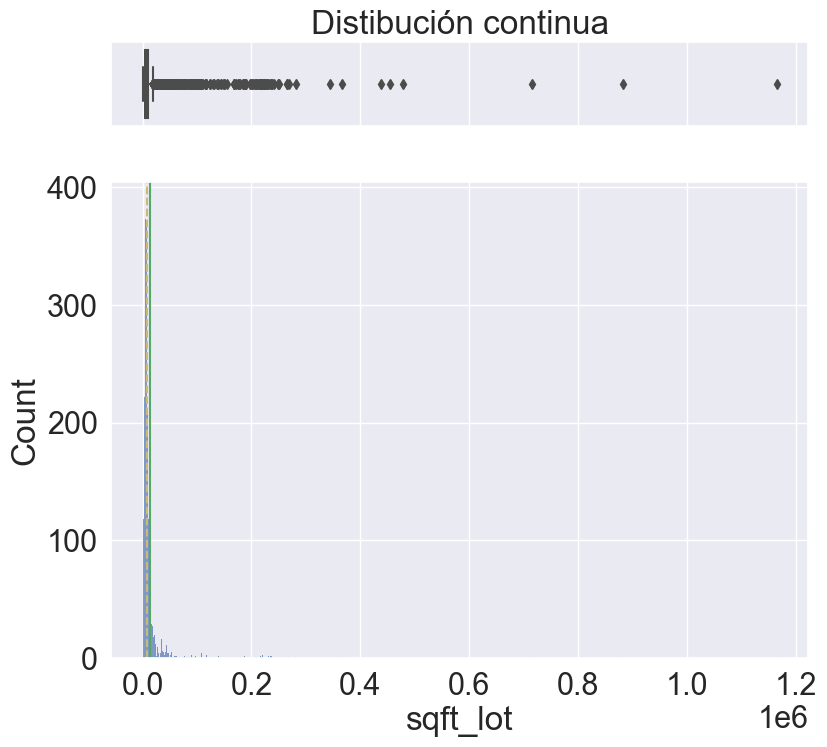

Cat
Cat
Cat
Cat
Cont


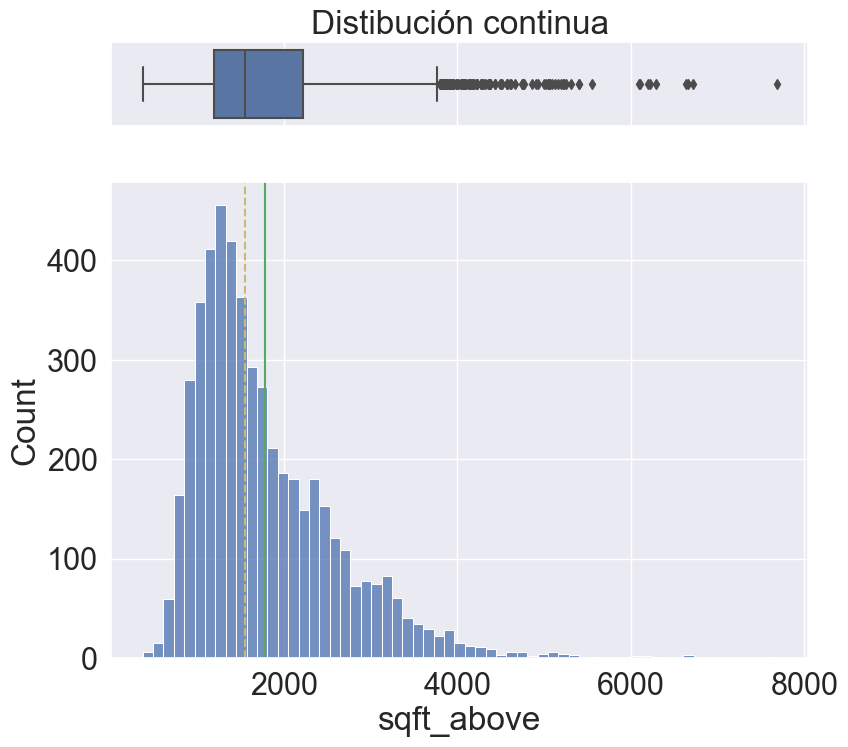

Cat
Cont


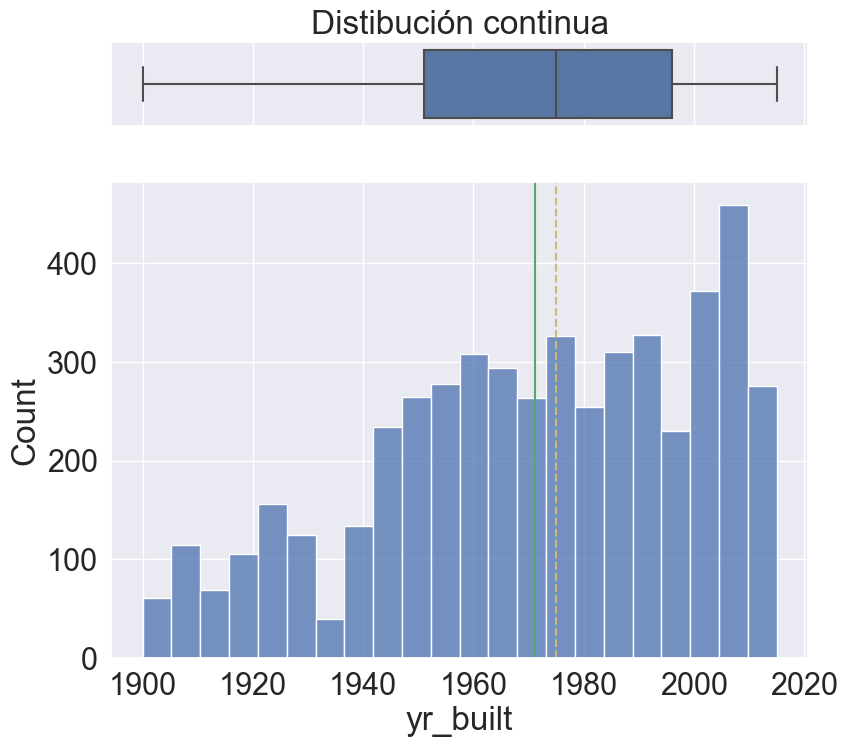

Cont


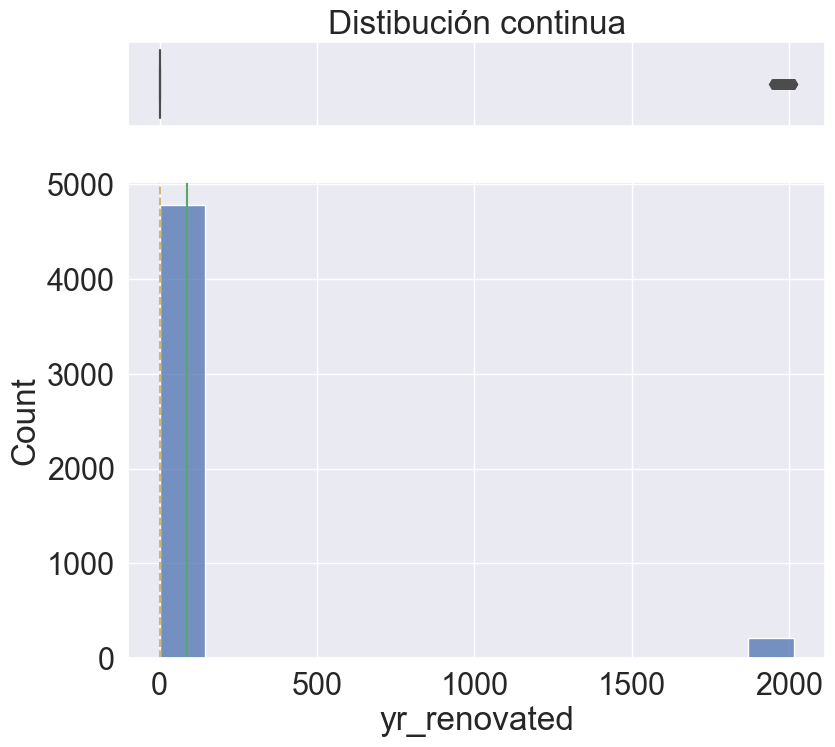

Cont


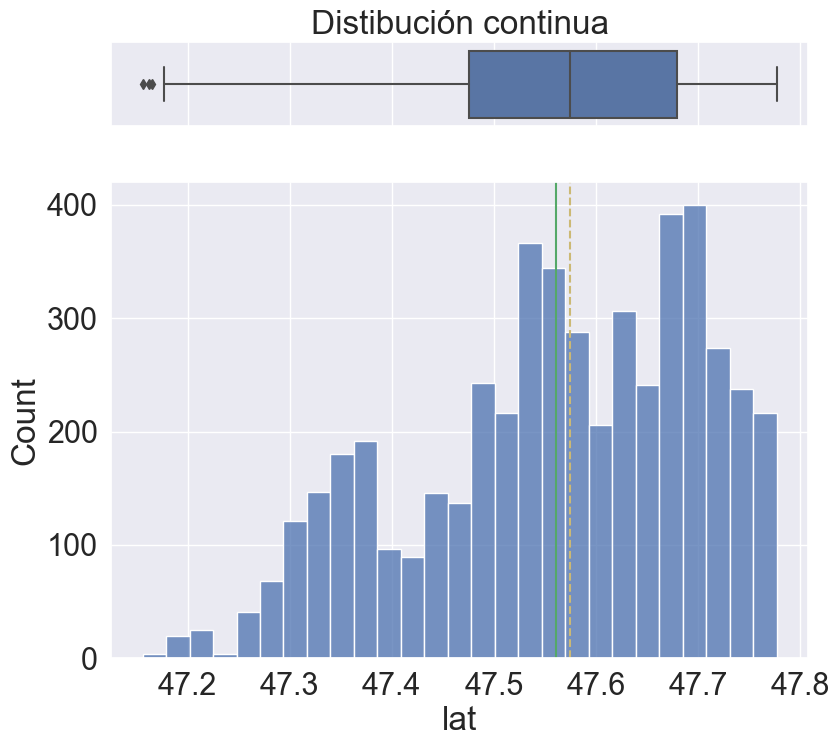

Cont


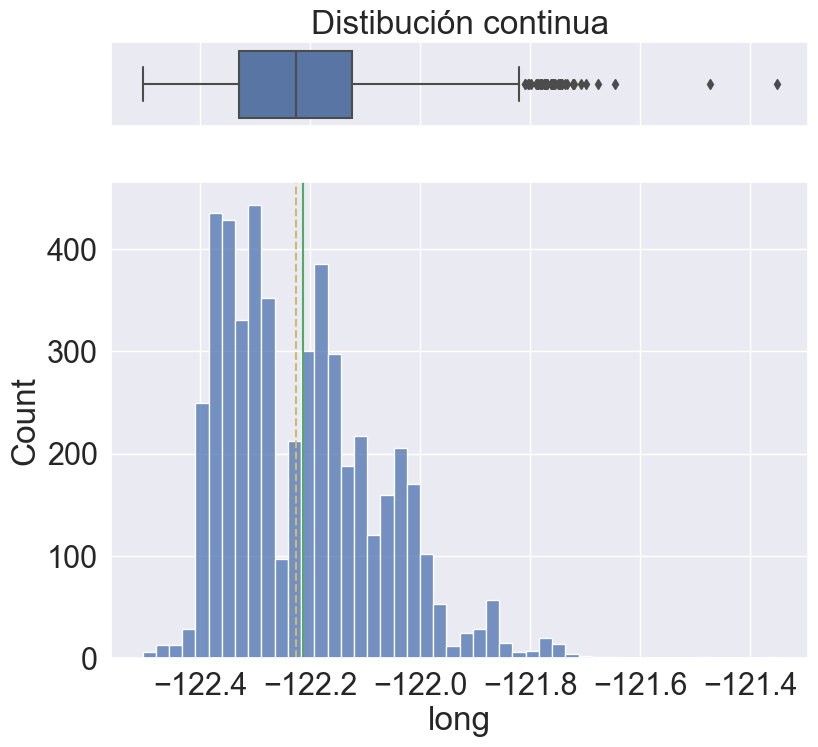

year            None
month           None
price           None
Luxury          None
bedrooms        None
bathrooms       None
sqft_living     None
sqft_lot        None
floors          None
waterfront      None
view            None
condition       None
sqft_above      None
basement        None
yr_built        None
yr_renovated    None
lat             None
long            None
dtype: object

In [12]:
viviendas.apply(plot)



Podríamos querer conocer la distribución y número de registros con muchas habitaciones en todas las variables para cruzar información y ver si tiene lógica algo. 



In [13]:
viviendas.loc[viviendas.bedrooms > 10,:].describe()



,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
count,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,6.896552,5.134586e+05,49.275862,2.155172,2155.172414,9312.793103,1882.758621,1985.758621,138.551724,47.527445,-122.218034
std,3.266112,3.144297e+05,11.828828,0.945888,862.606601,10150.808104,868.372437,19.472793,518.083459,0.148455,0.137346
min,1.000000,2.100000e+05,29.000000,0.000000,1100.000000,-1.000000,820.000000,1947.000000,0.000000,47.306500,-122.404000
25%,4.000000,3.250000e+05,41.000000,1.500000,1400.000000,3837.000000,1290.000000,1975.000000,0.000000,47.425800,-122.322000
50%,7.000000,4.030000e+05,51.000000,2.500000,2030.000000,5928.000000,1660.000000,1987.000000,0.000000,47.538500,-122.213000
75%,9.000000,5.850000e+05,56.000000,3.000000,2580.000000,9706.000000,2120.000000,2003.000000,0.000000,47.652600,-122.123000
max,12.000000,1.475000e+06,70.000000,4.000000,4770.000000,38461.000000,4770.000000,2013.000000,2013.000000,47.772100,-121.870000


Solamente hay 29 valores por encima de 10 y no parecen tener claro patrón de vivienda grande, cara etc.. Podríamos pasar a NA la información de esta variable para los 29 registros y luego imputar (mejor si fuera por método multi). Podemos también generar esa categoría miscelanea y convertir a nominal pero necesitaríamos bajar número de clases seguramente... habría que ver tablas de frecuencias etc. 



In [14]:
# Copio variable original
viviendas['bedrooms_cont'] = viviendas.bedrooms

# Transformo inplace sobre la copia
viviendas.loc[viviendas.bedrooms_cont > 10,'bedrooms_cont'] =np.nan


Creamos la variable en formato categórico. Si vemos la tabla de frecuencia, a partir de 6 habitaciones los niveles tienen muy poca representación...habrá que unir para evitar cosas. 



In [15]:
# Copio variable original
viviendas['bedrooms_cat'] = viviendas.bedrooms
#viviendas.bedrooms = viviendas.bedrooms.astype('category')
viviendas.loc[viviendas.bedrooms > 6,'bedrooms_cat'] = '6+'
viviendas.loc[viviendas.bedrooms < 2,'bedrooms_cat'] = '2-'

viviendas.bedrooms_cat = viviendas.bedrooms_cat.astype('category')


Comprobamos



In [16]:
viviendas.bedrooms_cat.value_counts(sort=False)



2      671
3     2233
4     1592
5      357
6       58
2-      46
6+      43
Name: bedrooms_cat, dtype: int64

Distribución contra precio. 



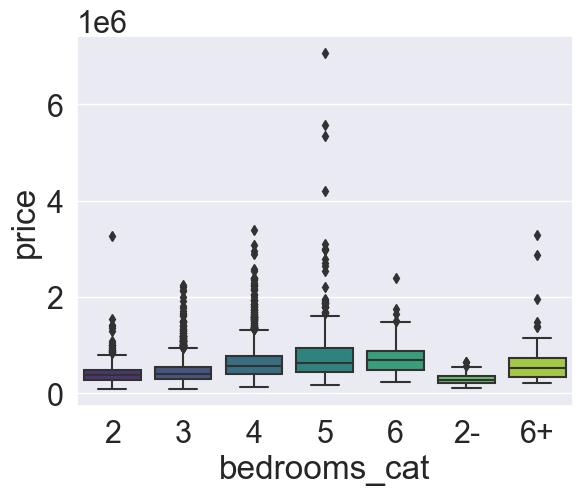

In [17]:
plt.clf()
sns.boxplot(x='bedrooms_cat',y='price',data=viviendas,palette='viridis')
plt.show()


Contra el logaritmo del precio.



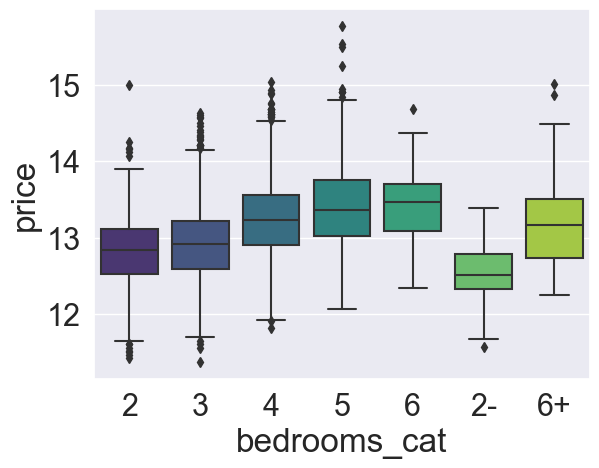

In [18]:
plt.clf()
sns.boxplot(x=viviendas.bedrooms_cat,y=np.log(viviendas.price),palette='viridis')
plt.show()


No tiene mala pinta pero con ese grpo +6 no demasiado fiable, ya sabemos. 

** Variable sqft_lot** 

Muy rara...tiene máximo muy lejos y por otro lado los -1.. 


In [19]:
viviendas.loc[viviendas.sqft_lot < 0,'sqft_lot'] =np.nan



Todo tipo de viviendas... no podemos establecer patrón y tendremos que considerar erróneo y pasar a missing...la vida



In [20]:
# Quitamos ese 99999 de la variable Azucar y lo pasamos a NA
#viviendas.Azucar.replace(99999,np.nan,inplace=True)

# Comprobamos el nuevo máximo
viviendas.sqft_lot.min(),viviendas.sqft_lot.max()


(638.0, 1164794.0)

Dado ese máximo veamos cuantas viviendas están por encima de 1M y sus características.



In [21]:
viviendas.loc[viviendas.sqft_lot > 1000000,:] #=np.nan



,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long,bedrooms_cont,bedrooms_cat
4453,2015,5,190000,0,2,1.0,710,1164794.0,1.0,0,0,?,710,0,1915,0,47.6888,-121.909,2.0,2


Superficie total enorme pero casa modesta...podría ser una casa de campo con finca grande pero por el precio...no nos fiamos mucho y nos estropea la distribución de la superficie total. podríamos decidir pasar a Na. (podríamos dejarlo y luego tratar outliers..)



In [22]:
viviendas.sqft_lot.max()



1164794.0

Ese sería el nuevo máximo y las viviendas por encima de medio millón no podemos sospechar que sean malas...son caras, medio grandes..


**Opción de trasnformación logarítmica**

Podríamos trasnformar la variable mediante logaritmo para ver si se centra un poco. 


Cont


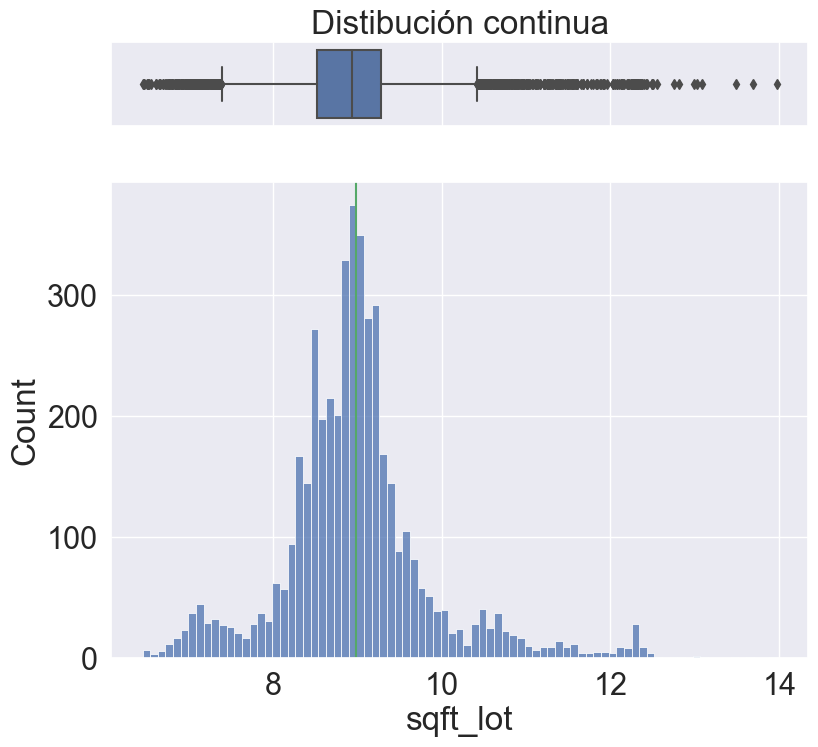

In [23]:
plot(np.log(viviendas.sqft_lot))

plt.show()


No tiene mala pinta! Vamos a considerarla. 



In [24]:
viviendas['log_sqft_lot'] = np.log(viviendas.sqft_lot)



4. **Condition**. Veíamos esa categoría ? que nos llama la atención. Veamos si se trata de algo residual y podemos pasar a missing para imputar posteriormente o si es una categoría con importancia en volumen y patrón frente al objetivo. 



In [25]:
# Frecuencias de las categorías de clasificación
viviendas.condition.value_counts()

# Tabla de contingencia con la variable objetivo binaria Compra
pd.crosstab(index=viviendas['Luxury'], columns=viviendas['condition'], normalize='columns')


condition,?,A,B,C,D
Luxury,,,,,
0,0.85,0.495146,0.576214,0.597362,0.6
1,0.15,0.504854,0.423786,0.402638,0.4


Reemplazar los ? por Desconocido pues representa una categoría importante en volumen y con un posible patrón interesante ante la variable objetivo. Se intuye que los viviendas de condición desconocida tienen bastante menor probabilidad de ser vivienda de lujo! 



In [26]:
# Reemplazar los ? por Deconocido pues representa una categoría importante en volumen y con un posible patrón interesante
viviendas.condition.replace('?','Desc',inplace=True)


Por otro lado, esa categoría D no me gusta ni un pelo con sus tristes 5 registros...además, la frecuencia relativa de 0 y 1 de la objetivo binaria es prácticamente igual...pinta que vamos a unir esas categorías. 



In [27]:
viviendas.condition.replace(['C','D'],'CD',inplace=True)



In [28]:
viviendas.describe()



,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,bedrooms_cont,log_sqft_lot
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,4.618000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4971.000000,4618.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.486851e+04,1784.89840,1971.084200,86.157000,47.561237,-122.213915,3.357876,8.986030
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.888862e+04,824.33091,29.242444,405.523818,0.138218,0.140557,0.908748,0.904738
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,6.380000e+02,370.00000,1900.000000,0.000000,47.155900,-122.505000,0.000000,6.458338
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,5.048500e+03,1190.00000,1951.000000,0.000000,47.475275,-122.330000,3.000000,8.526846
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.617500e+03,1550.00000,1975.000000,0.000000,47.574500,-122.226500,3.000000,8.938204
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.074275e+04,2220.00000,1996.000000,0.000000,47.678925,-122.124000,4.000000,9.281986
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,2015.000000,47.777000,-121.352000,10.000000,13.968055


- **Waterfront**. A ver esos -1. Pemnsamiento: Podría ser fallo de picar datos..en cuyo caso serían 1 y su distribución ante, por ejemplo la obsjetivo binaria, debería ser similar en ambas clases. Si no es así...ni idea..pasar a NA.



In [29]:
# Frecuencias de las categorías de clasificación
viviendas.waterfront.value_counts()

# Tabla de contingencia con la variable objetivo binaria Compra
pd.crosstab(index=viviendas['Luxury'], columns=viviendas['waterfront'], normalize='columns')


waterfront,-1,0,1
Luxury,,,
0,0.603774,0.580791,0.095238
1,0.396226,0.419209,0.904762


Nada que ver...si tuviéramos que decidir, se parece mas a los 0 de waterfront. Pero esto sería jugársela un poco...se podría tirar del hilo con otras variables y ver si parecen realmente 0s...sino a missing y luego imputamos. 



In [30]:
viviendas.waterfront.replace(-1,np.nan,inplace=True)



## Apartado 4

**Crea una variable categórica a partir de la variable “yr_renovated” que tome el valor 0 cuando la variable no haya sido renovada; y 1, en otro caso. Rechaza la variable original.**

A la orden! Tiene toda la lógica del mundo. De hecho, creo que voy a pisarla..me la juego! Además le vamos a decir que todo valor mayor que 0 es un 1 en char para transformar la variable directamente en nominal. 


In [31]:
#viviendas.waterfront.replace(-1,np.nan,inplace=True)
viviendas.loc[viviendas.yr_renovated > 0,'yr_renovated'] = '1'


**Vistazo final**



In [32]:
viviendas.describe()



,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,4.618000e+03,5000.00000,5000.000000,5000.000000,5000.000000,4971.000000,4618.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.486851e+04,1784.89840,1971.084200,47.561237,-122.213915,3.357876,8.986030
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.888862e+04,824.33091,29.242444,0.138218,0.140557,0.908748,0.904738
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,6.380000e+02,370.00000,1900.000000,47.155900,-122.505000,0.000000,6.458338
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,5.048500e+03,1190.00000,1951.000000,47.475275,-122.330000,3.000000,8.526846
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.617500e+03,1550.00000,1975.000000,47.574500,-122.226500,3.000000,8.938204
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.074275e+04,2220.00000,1996.000000,47.678925,-122.124000,4.000000,9.281986
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,47.777000,-121.352000,10.000000,13.968055


In [33]:
viviendas.describe(exclude=np.number)



,year,Luxury,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat
count,5000,5000,5000.0,4894,5000,5000,5000,5000,5000
unique,2,2,6.0,2,2,4,2,2,7
top,2014,0,1.0,0,0,B,0,0,3
freq,3416,2886,2463.0,4852,4509,3254,3044,4784,2233


Una vez libres de errores graves, las variables están preparadas para la gestión de outliers y missing. Para ello, es importante separa las variables objetivo y trabajar en el archivo de predictores. No es habitual tocar las variables objetivo puesto que representan nuestra verdad verdadera, son las variables de supervisión y se presuponen bien recogidas. 



In [34]:
#Indico la variableObj, el ID y las Input 
# los atípicos y los missings se gestionan sólo de las input
varObjCont = viviendas.price
varObjBin = viviendas.Luxury
imput = viviendas.drop(['price','Luxury'],axis=1)

imput.head()


,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long,bedrooms_cont,bedrooms_cat,log_sqft_lot
0,2014,7,3,2.5,2070,NaN,1.0,0,0,CD,1540,1,1980,0,47.5936,-122.013,3.0,3,NaN
1,2014,6,2,1.5,1640,NaN,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325,2.0,2,NaN
2,2014,10,4,3.5,3720,NaN,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940,4.0,4,NaN
3,2014,12,3,3.5,2260,NaN,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361,3.0,3,NaN
4,2014,10,3,2.0,2050,NaN,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328,3.0,3,NaN


# Valores atípicos 

Para facilitarnos la vida y complementar la idea que tenemos ya sobre las distribuciones de las variables, llevamos a cabo un conteo de los valores que se consideran extremos según un consenso de dos criterios distintos. En primer lugar, se distingue variable simétrica o posiblemente no, para aplicar *media + 3 sd* ó *mediana + 8 mad*, respectivamente. Recordamos en este punto que todas las medidas de dispersión basadas en la mediana o cuartiles son muy poco sensibles a la presencia de asimetría en la distribución, siendo por ello más fiables en este caso. Por otro lado, aplicamos el clásico criterio del boxplot umbrales en *cuartil1 - 3IQR* y *cuartil3+ 3IQR*. 

Para aclarar, veamos un momento las asimetrías de las variables numéricas.


In [35]:
viviendas.select_dtypes(include=np.number).apply(lambda x: x.skew())



month             0.069568
price             4.276497
bedrooms         12.916180
bathrooms         0.035777
sqft_living       1.404513
sqft_lot         12.669925
sqft_above        1.414411
yr_built         -0.465003
lat              -0.511038
long              0.796275
bedrooms_cont     0.516756
log_sqft_lot      0.905476
dtype: float64

Asimetrías en valor absoluto mayores a la unidad son signo de distribución significativamente sesgada a la derecha/positiva (+) o izquierda/negativa (-). 


Antes de gestionar aquellos valores detectados como outliers, valoramos la incidencia en cada variable contando el porcentaje de registros atípicos en relación al total de registros. Con ello, evaluamos si estamos ante un problema grave (tener más de un 20% de valores atípicos en alguna variable es síntoma de distribución bimodal, hay en realidad dos poblaciones jugando en la distribución) o si por el contrario, se trata de un % bajo con el que podamos lidiar sin graves consecuencias en las distribuciones de las variables. 

Vamos a crear una **función gestiona_outliers** para facilitar el trabajo en este sentido. La idea es tener una sola función que implemente:

1- **Visualización de la incidencia** de outliers --> Toma de decisiones

2- **Gestión** de los mismos: 

  2.1- **Winsorizar**: Colapsar todo valor mayor o menor que los umbrales de cierto rango (dado por percentiles habitualmente) para igualarlo con esos umbrales. Como ya comentábamos, este método conserva la integridad del datos en el sentido de que si era muy grande por la derecha ahora estará en el extremo, pero puede provocar carga excesiva de las colas de la distribución, generando quizá algunas rarezas en picos de densidad.. 
  
  2.2- **Convertir en NAs**: Asumiendo que los valores extremos son inaceptables (es decir, se sospecha que no puede ser tan alto o bajo por alguna razón). Podríamos pensar en que sea un fallo y por tanto decidir pasar a missing esos valores para luego gestionarlos con los valores perdidos. Esta técnica podría incurrir en errores graves de cambio del sentido de la información. Por ejemplo, en este caso un vino muy caro, pero que es un vino real y ese es su precio, es lo que hay...bueno considerándo que es erróneo, pasamos a Na e imputamos por media o valor aleatorio, quedando este valor de precio en un entorno central...tal vez hay características que generaban un patrón de precio alto que ahora serán mal aprendidas por el modelo... Hay que andarse con ojo con estas cosas.. 
  
En cualquier caso, ahí queda la función para utilizarla como se considere y tal vez incluir o desarrollar nuevas formas de tratamiento.. 


In [36]:
# Llamada gestiona_outliers en modo check
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))


month
bedrooms
bathrooms
sqft_living
sqft_lot
sqft_above
yr_built
lat
long
bedrooms_cont
log_sqft_lot


C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is depre

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot
0,0.0,0.00,0.00,0.0,0.000000,0.00,0.0,0.0,0.00,0.0000,0.000000
1,0.0,0.58,0.08,0.1,1.927241,0.06,0.0,0.0,0.04,0.1207,1.840624
2,0.0,0.58,0.08,0.1,1.927241,0.06,0.0,0.0,0.04,0.1207,1.840624


Como pequeño resumen, lo que buscamos con el tratamiento de outliers es identificar valores verdaderamente extremos y que no sea típicos, lo cual necesariamente implica que han de ser pocos!! Y esto es muy relevante. Si son el 20% de los registros...pues tal vez estamos ante dos poblaciones distintas... habría que abordar el problema de otra forma..tal vez tratar cada población por separado.



In [37]:
# Crear copia para evitar pisar información
vinCont = imput.select_dtypes(include=np.number).copy()

# Aplicar la gestión de outliers en modelo winsor
viviendas_winsor = vinCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))

# Contemos si ha desaparecido algún resgitro o algo 
# viviendas_winsor.apply(lambda x: x.isna().sum()/x.count()*100)

# Veamos los valores mínimos de acidez ahora
# viviendas_wins.sort_values(by='Acidez').head()

# Veamos los valores mínimos de acidez ahora
# viviendas.sort_values(by='Acidez').head()


month
bedrooms
bathrooms
sqft_living
sqft_lot
sqft_above
yr_built
lat
long
bedrooms_cont
log_sqft_lot


C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Kim\Desktop\mineria_datos\PARTE I_Depuracion y Regresiones\Dia3_Regresión Logística\NuestrasFunciones.py:104: FutureWarning:

The 'mad' method is depre

Recordemos que la búsqueda de outliers atañe en exclusiva a las variables numéricas por lo que el archivo de salida no tiene los factores. Vamos a juntar numéricas y factores en un solo archivo para valorar la incidencia de perdididos en el conjunto completo. 



In [38]:
# Juntar columnas con join
imput_wins = viviendas_winsor.join(imput.select_dtypes(exclude=np.number))


Muchas alternativas disponibles, lo importante es conocer las fortalezas y debilidades de cada uno y aplicarlo con lógica según resulte más conveniente para los datos que manejamos. 

# Valores perdidos 

Entramos de lleno en la segunda gran gestión que debemos llevar a cabo antes de la modelización. Los archiconocidos valores perdidos. En primer lugar comentar que, llegados a este punto tenemos valores perdidos de dos fuentes distintas, por una parte los que vienen "de serie" en el dataset que podemos asociar a falta de medida en la recogida de los datos y aquí existe toda una teoría sobre los mecanismos de aparición de dichos missing, completamente al azar (MCAR), al azar(MAR) o nada de azar y existe patrón (MNAR). 

Dejo por aquí un poco más de información y diversos métodos propuestos para la imputación de estos valores. 

https://stefvanbuuren.name/fimd/sec-MCAR.html

Nuestro objetivo, en este limitado módulo, será valorar la incidencia de los valores perdidos y conocer los métodos usuales de imputación univariante (cada variable independientemente de las otras) con sus pros y contras. 

Que podemos hacer con los missings? 

1) **Eliminar u omitir del dataset**

Eliminar "por lista" los Nas, es decir, eliminar del dataset toda observación con al menos un NA en al menos 1 variable. Se consigue liberar el dataset de perdidos (algunas técnicas y análisis no permiten su inclusión) pero se puede incurrir en los problemas que comentamos en el siguiente punto. 

2) **Nada** 

Podemos obviar la presencia de valores perdidos y ya el modelo se encargará de quitarlos "por lista", es decir, eliminar del análisis toda observación con al menos un NA en el set de variable escogido (importante este punto! si elegimos un modelo con las variables v1:v5, no se eliminarán los registros completos en estas variables pero con perdidos en v6:v10, he aquí la diferencia con la omisión de missings de primeras para toto el archivo). Esto es habitual y se puede hacer, ahora bien no está exento de peligros. Veamos.

- Peligro de los **missings cruzados**. Imaginamos el caso en que tenemos 10 variables y 100 registros y cada una de ellas tiene un 5% de perdidos...No parece mucho con lo cual los quitamos por lista. Nuestro pensamiento es 5% pero, si se da el caso de que los NA de cada variable aparecen en registros distintos...entonces tenemos 5*10= 50% de los registros con al menos un perdido...hemos perdido la mitad de la información!!! 

- **Sesgo** por valores perdidos. El simple hecho de eliminar observaciones por el mero hecho de que presenten perdidos puede introducir un importante sesgo de selección de registros en los modelos. Imaginemos que la gente mayo tiende a no contestar ciertas preguntas en una encuesta, eliminamos y nos quedamos con muy poca gente mayor por lo que las conclusiones con toda seguridad estarán sesgadas hacia los jóvenes. 

3) **Imputar** sus valores. 

No queremos exponernos a lo anterior por lo que se puede adoptar la estrategia de asignar un valor a estos datos no conocidos. 

- **Imputación por valores centrales (media, mediana)**: Muy habitual asignar valores centrales ya que no alteran la distribución de las variables como tal. El gran inconveniente de este método es a subestimación de la verdadera varianza de la variable ya que estamos centrando demasiado la distribución haciendo que artificialmente su varianza se reduzca, en ocasiones muy drásticamente. 

- **Imputación por valores aleatorios**: Si no queremos centrar tanto la distribución, podemos optar por asignar al azar valores observados de las distribuciones de cada variable a los registros con NA. De esta forma, cualquier valor en el rango observado puede ser asignado a los faltantes. El gran inconveniente de esto es la dependencia del azar.

- **Imputación por modelos multivariantes**: Muchas opciones en este apartado. Existen métodos que tienen en cuenta los valores observados de otras variables para asignar el valor más "plausible" a la variable perdida en un sentido conjunto. Una de las alternativas es generar imputaciones por un modelo de regresión por ejemplo, así para imputar Azucar utilizaremos un modelo que estime los valores de azucar en base a las demás variables (que se ajustará con los valores validos por lista) y posteriormente predeciremos los perdidos de azucar mediante este modelo generado. De esta misma forma existen modelos de imputación por random forest (missforet), vecinos más cercanos (knn), cadenas de Markov (hmisc, amelia) y gran cantidad de aproximaciones de imputación múltiple (imputar n veces y promediar). El mayor problema de estos métodos suele radicar en el posible sobreajuste a los datos de training. 


El primer paso es valorar la incidencia de los valores perdidos ya que si no representan gran proporción, no existe gran peligro de cambio en la distribución de las variables con independencia del método utilizado para la imputación.  

## Incidencia 

Vamos a actuar por dos vías, filas y columnas para contar el % de perdidos en cada registro y en cada variable. Con esta información tomaremos decisiones sobre gestión. 


- **Missings por variable**.


In [39]:
#Proporción de missings por variable 
imput_wins.apply(lambda x: x.isna().sum()/x.count()*100)


month            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         8.271979
sqft_above       0.000000
yr_built         0.000000
lat              0.000000
long             0.000000
bedrooms_cont    0.583384
log_sqft_lot     8.271979
year             0.000000
floors           0.000000
waterfront       2.165917
view             0.000000
condition        0.000000
basement         0.000000
yr_renovated     0.000000
bedrooms_cat     0.000000
dtype: float64

Controlado esto, vemos que sulfatos es la variable más peligrosa con más de un 10% de perdidos..Digamos que es la variable en la que mayores dudas tenemos respecto a la conservación de su distribución tras la imputación. Por lo demás, valores relativamente bajos. 


- **Missings por observación**.

Calcularemos ahora el % de missings por observación y vamos a aplicar un truquiflor que a veces nos ayuda mucho a controlar las imputaciones. Se trata de generar una variable en el archivo que cuanta la proporción de perdidos que tiene cada registro. De esta forma siempre tenemos una huella de los registros con alta carga de imputaciones por si necesitamos saber algo sobre ellos en la etapa de modelado. Es más, esta será una variable que incluiremos en el modelo para valorar si puede generar un patrón de comportamiento respecto a la variable objetivo. 


In [40]:
#Proporción de missings por observación (como una nueva columna del dataset)
imput_wins['prop_missings'] = imput_wins.apply(lambda x: x.isna().sum()/x.count()*100,axis=1)

# Valoramos distribución
imput_wins.prop_missings.describe()


count    5000.000000
mean        1.052541
std         3.282681
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.750000
Name: prop_missings, dtype: float64

Vamos a ordenar el archivo por la nueva variable creada para ver el aspecto. Se observa que los registros con más missing tienen como mucho 3 variables perdidas y parece que sqft_lot repetida. No es mala idea conservar registros e imputar puesto que podría no entrar en el modelo siquiera estas variables que se encuentran perdidas! 



In [41]:
imput_wins.sort_values(by='prop_missings', ascending=False).head()



,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,prop_missings
232,5,2,1.5,1110,NaN,930,2005,47.6319,-122.362,2.0,NaN,2014,2.0,NaN,0,B,1,0,2,18.75
182,9,29,3.0,2170,NaN,1290,1977,47.6910,-122.113,NaN,NaN,2014,1.0,0,0,B,1,0,6+,18.75
93,8,3,1.0,1050,NaN,930,1920,47.5402,-122.380,3.0,NaN,2014,1.0,NaN,0,B,1,0,3,18.75
3421,4,29,3.0,2910,NaN,1800,1970,47.6939,-122.391,NaN,NaN,2015,1.0,0,0,A,1,0,6+,18.75
3462,3,3,2.5,1620,NaN,1620,2002,47.4491,-122.120,3.0,NaN,2015,2.0,NaN,0,B,0,0,3,18.75


## Coexistencia y patrones de missings

Podemos echar un vistazo a la correlación en la existencia de missings para valorar si existe algún patrón de aparición de los mismos. En caso de que observemos patrones de aparición, podemos tirar del hilo e indagar el porqué de ese comportamiento para decidir el método más adecuado para imputar. 

Hay un paquete disponible llamado **missingno** que implementa un par de funciones gráficas interesantes para la detección de patrones de coaparición de los valores perdidios en diferentes variables. 


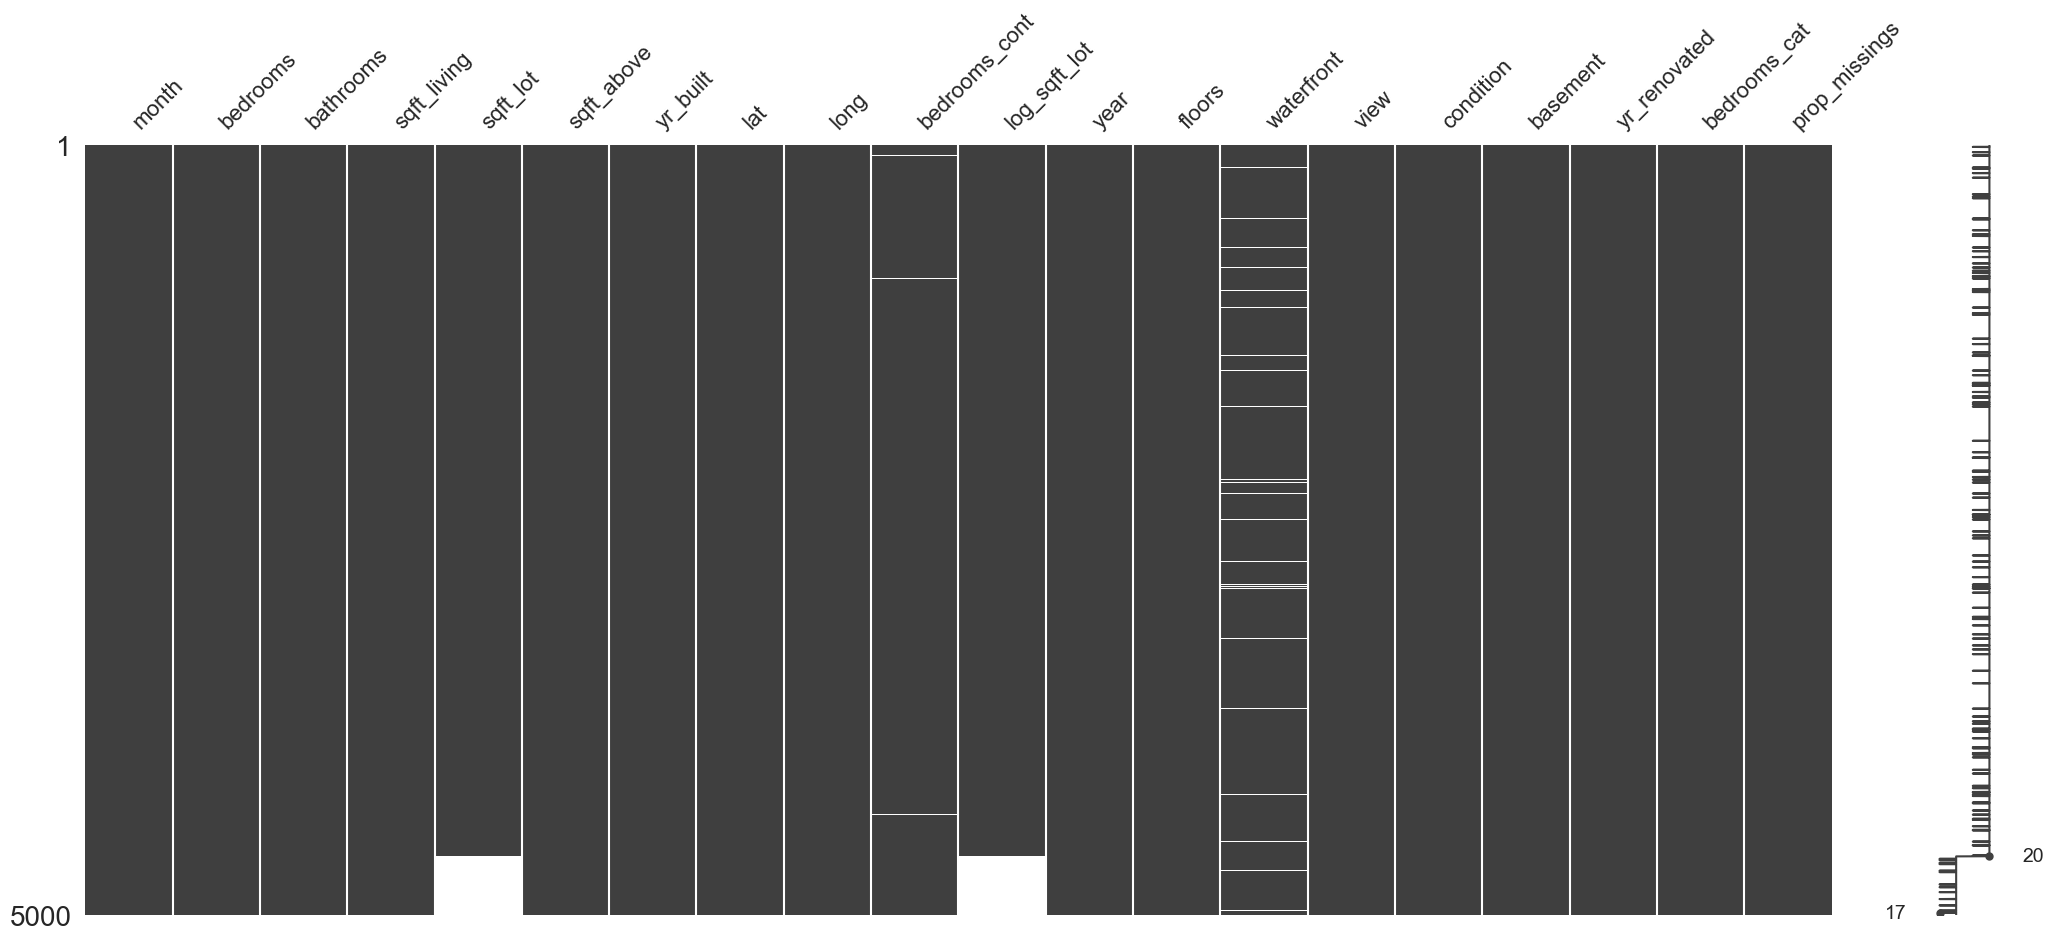

In [42]:
#conda config --add channels conda-forge
#conda install missingno
# pip install missingno
import missingno as msno   

# Plot correlation heatmap of missingness
msno.matrix(imput_wins.sort_values(by='sqft_lot'))
plt.show()


No se intuyen patrones de aparición de missings con facilidad, excluyendo la misma distribución de perdidos en sqft_loit y su transformada logarítmica, algo que es lógico!  

Veamos esto en el mapa de calor. 


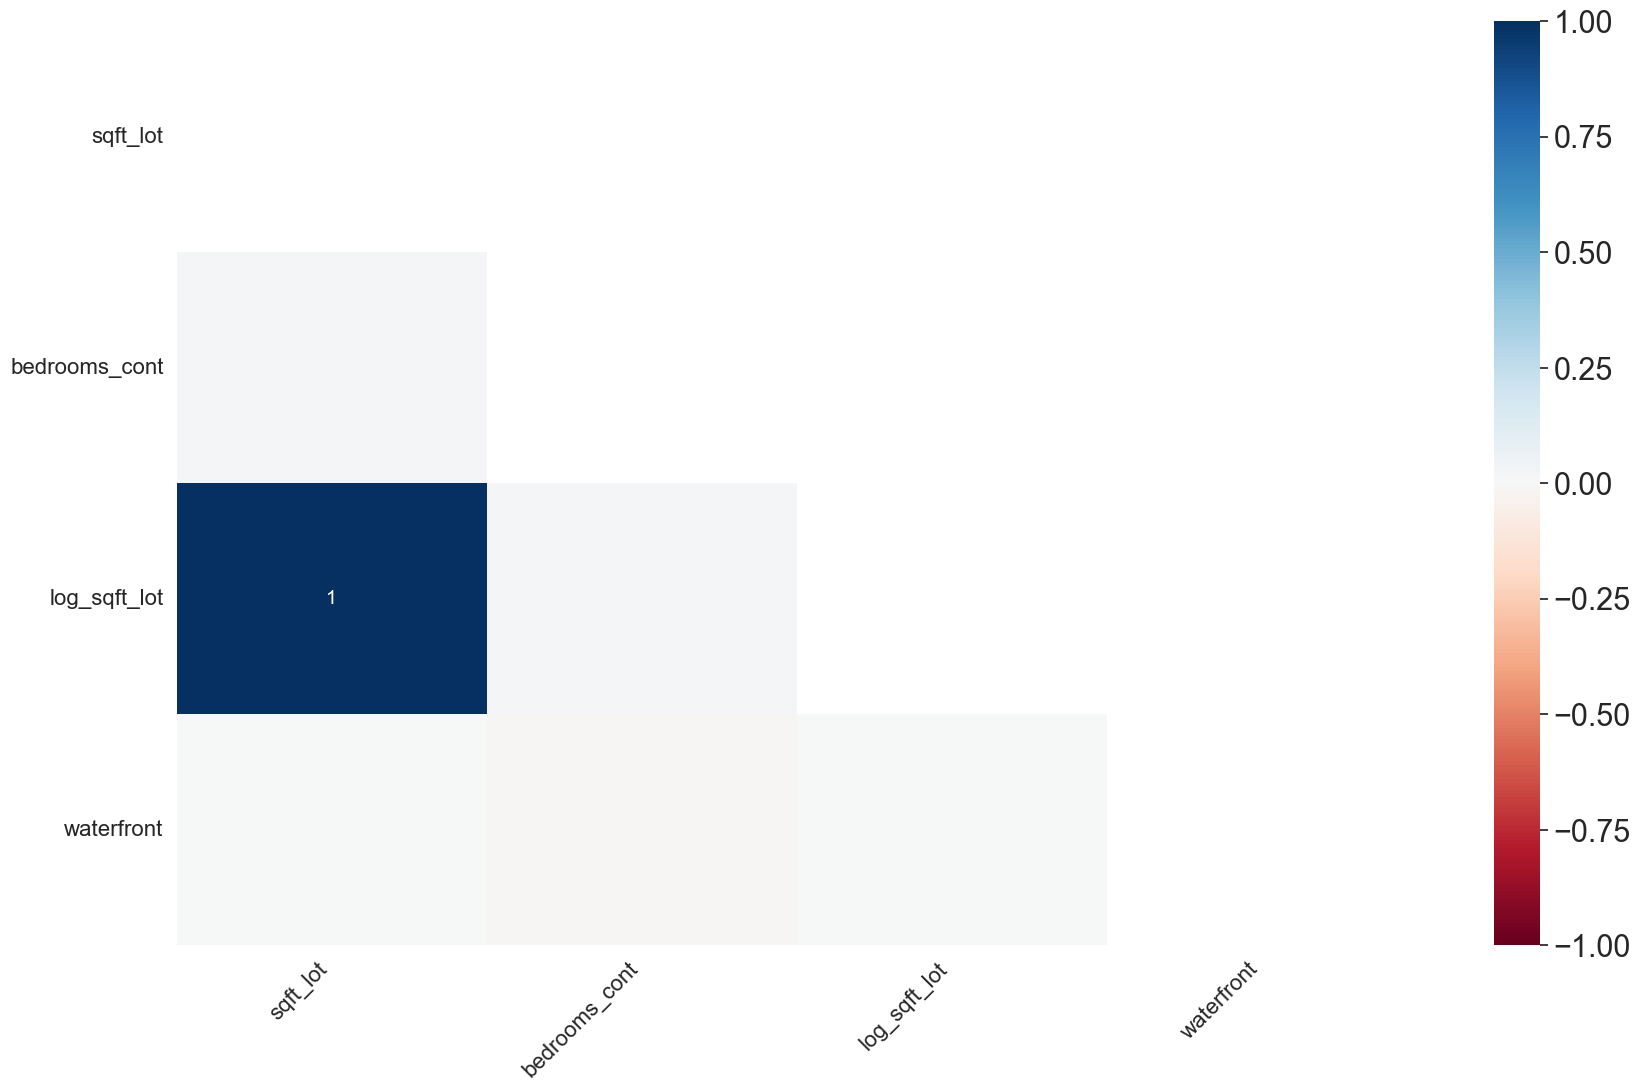

In [43]:
msno.heatmap(imput_wins)
plt.show()


Mismas conclusiones, no se observa coexistencia de missing a excepción del patrón trivial entre transfromadas.

## Imputaciones

Llegados a este punto, hemos comprobado que la incidencia de valores perdidos no es preocupante en general (con sulfatos con ese 10% que nos invita a estar atentos) por lo que vamos a decidirnos por la imputación de los datos de cara a mantener la mayor base muestral posible para el ajuste de los futuros modelos a los datos. 

Nos puede la curiosidad y nos planteamos que pasaría si elimináramos los NAs por lista del dataset. Cuantas observaciones perderíamos? Las variables que mayor carga de perdidos presentan, son realmente relevantes para un posible modelo? 


In [44]:
imput_wins.dropna().describe()



,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings
count,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.0
mean,6.563167,3.358763,2.141125,2074.813835,12524.892794,1786.742438,1971.129448,47.561582,-122.214122,3.358096,8.973139,0.0
std,3.117501,0.908043,0.869801,907.780410,18865.925024,819.668410,29.220061,0.137876,0.140170,0.904010,0.865003,0.0
min,1.000000,0.000000,0.000000,370.000000,638.000000,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,0.0
25%,4.000000,3.000000,1.500000,1410.000000,5049.500000,1200.000000,1952.000000,47.477225,-122.329250,3.000000,8.527044,0.0
50%,6.000000,3.000000,2.500000,1910.000000,7615.000000,1560.000000,1975.000000,47.574700,-122.227000,3.000000,8.937875,0.0
75%,9.000000,4.000000,2.500000,2560.000000,10720.000000,2230.000000,1996.000000,47.679125,-122.125000,4.000000,9.279866,0.0
max,12.000000,10.000000,6.000000,7710.000000,115434.000000,6660.000000,2015.000000,47.777000,-121.473000,8.000000,11.725695,0.0


Nos quedamos con 4469 registros en total para todas las variables, lo que supone un 89% de la información del archivo. Nos hemos cargado el 11% de registros.. 

Conclusión, imputemos! 

Vamos a explorar algunas posibilidades de los paquetes *sklearn* y *feature_engine* para imputaciones simples y multivariantes de varios tipos. 

Definiremos los imputadores disponibles y posteriormente los aplicaremos a los datos.


In [45]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer
# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

import feature_engine.imputation as fe_imp
# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()
# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')
# Media: solo nominales
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')


Separaremos el dataset de nuevo en continuas y categóricas para aplicar los métodos que correspondan. 



In [46]:
imput_wins_cont = imput_wins.select_dtypes(include=np.number)
imput_wins_cat = imput_wins.select_dtypes(exclude=np.number)


Posibilidades para las **numéricas**:

1- Nivel **univariante**

Comenzamos proponiendo métodos de imputación univariante que se basan en la información exclusiva de la distribución de la propia variable sin mirar a sus compañeras. En este plano, opciones ya comentadas como media, mediana o aleatorio. 


In [47]:
# Media
viviendas_winsor_mean_imputed = imputer_mean.fit(imput_wins_cont).transform(imput_wins_cont)
# Mediana
viviendas_winsor_median_imputed = imputer_median.fit(imput_wins_cont).transform(imput_wins_cont)


2- Nivel **multivariante**

Podemos explorar un par de posibilidades que se utilizan en el mundillo. Por una parte, las imputaciones basadas en la técnica de los k vecinos más cercanos (digamos que es un método espacial) que asocia valores promedio de los k vecinos más cercanos a la observación perdida pero jugando en el espación R^k siendo k el número de variables. Es decir, identifica registros parecidos en general en todas las variables (que estén cerca en ese hiperespacio), lo cual es una buena idea. El mayor problema que tiene es la dependencia del valor k (no hay consenso en este aspecto y depende de los datos) y el posible sobreajuste a los datos de training como cualquier otro método multi. 


In [48]:
# Fit/transform
imput_wins_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)
imput_wins_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)


C:\Users\Kim\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Posibilidades para las **nominales**:

Para las variables categóricas podemos utilizar moda (la categoría más representada) o aleatorio. 


In [49]:
imput_wins_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_wins_cat),columns=imput_wins_cat.columns)



Aplicar random a nivel general ya que acepta todo tipo. 



In [50]:
imput_wins_rand_imputed = imputer_rand.fit(imput_wins).transform(imput_wins)
imput_wins_rand_imputed.describe()


,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.589400,3.506600,2.139500,2076.556000,12522.81080,1784.682400,1971.084200,47.561237,-122.213939,3.357600,8.977474,1.052541
std,3.120377,2.147855,0.867606,910.536417,18864.29262,822.925329,29.242444,0.138218,0.140419,0.903707,0.872133,3.282681
min,1.000000,0.000000,0.000000,370.000000,638.00000,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,0.000000
25%,4.000000,3.000000,1.500000,1410.000000,5029.25000,1190.000000,1951.000000,47.475275,-122.330000,3.000000,8.525955,0.000000
50%,6.000000,3.000000,2.500000,1910.000000,7614.50000,1550.000000,1975.000000,47.574500,-122.226500,3.000000,8.937218,0.000000
75%,9.000000,4.000000,2.500000,2560.000000,10720.50000,2220.000000,1996.000000,47.678925,-122.124000,4.000000,9.285007,0.000000
max,12.000000,29.000000,6.000000,7710.000000,115434.00000,6660.000000,2015.000000,47.777000,-121.473000,8.000000,11.725695,18.750000


# Toma de decisiones y guardado del archivo depurado

En esta caso vamos a elegir la gestión de outliers por winsor y la imputación por aleatorio pero cualquier otra alternativa es válida. Os animo a probar y buscar diferencias en los futuros modelos de regresión. 


In [51]:
# Agregar variables objetivo al input ya limpio
viviendas_wins_rand_imputed = pd.concat([imput_wins_rand_imputed, varObjCont,varObjBin], axis=1)

# Guardar archivo
viviendas_wins_rand_imputed.to_csv('C:\\Users\\Guille\\Documents\\MineriaDatos_2022_23\\PARTE I_Depuracion y Regresiones\\Dia1_MDDepuracion\\DatosViviendasDep_winsRand.csv')


OSError: Cannot save file into a non-existent directory: 'C:\Users\Guille\Documents\MineriaDatos_2022_23\PARTE I_Depuracion y Regresiones\Dia1_MDDepuracion'


Ya tenemos los datos depurados para poder empezar con el modelado. Es importante saber que a la hora de modelar utilizaremos este nuevo conjunto **datosViviendasDep_metodos** y no el original, que para eso nos lo hemos trabajado. 
